In [37]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Global variables
name = "Michał"
surname = "Święciło"
F = len(name)
L = len(surname)

## Excercise 1 -  Generated Quantities Block

In [38]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,27.6070,24.0,30.0,25.0,22.0,30.0,25.0
1,0.0,0.0,64.2035,78.0,67.0,84.0,59.0,72.0,70.0
2,0.0,0.0,185.0350,159.0,184.0,179.0,182.0,198.0,162.0
3,0.0,0.0,63.9199,53.0,57.0,53.0,57.0,63.0,56.0
4,0.0,0.0,192.5920,211.0,197.0,194.0,189.0,197.0,199.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,305.7850,322.0,319.0,316.0,333.0,287.0,302.0
996,0.0,0.0,60.9725,60.0,52.0,70.0,59.0,61.0,74.0
997,0.0,0.0,193.8830,190.0,191.0,178.0,226.0,206.0,194.0
998,0.0,0.0,30.7725,35.0,26.0,24.0,41.0,20.0,25.0


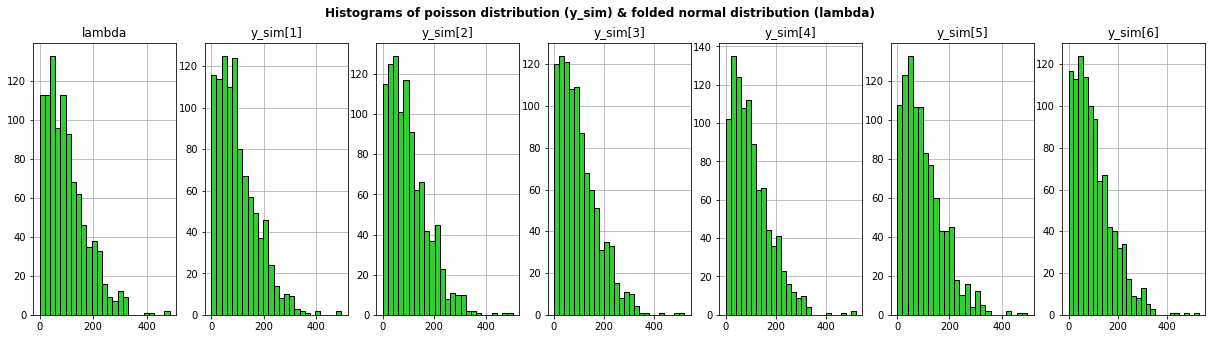

In [39]:
# Compilation of code_1.stan using M=F
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

# Creation of pandas dataframe from resulting draws
df = samples.draws_pd()
display(df)

# Histogram for each of y_sim and lambda
fig, axs = plt.subplots(nrows=1, ncols=F+1, figsize=((F+1)*3, 5))
fig.suptitle('Histograms of poisson distribution (y_sim) & folded normal distribution (lambda)', fontweight="bold")

for i, data_title in enumerate(list(df.columns)[2:]):
    axs[i].hist(df[data_title], bins='auto', color='limegreen', edgecolor="black", zorder=3)
    axs[i].set_title(data_title)
    axs[i].grid(zorder=0)

plt.show()

## Excercise 2 - Constraints on the data 

In [49]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-4.01756,0.925910,0.900071,1.0,1.0,0.0,4.06278,0.651185
1,-4.89772,0.816704,0.900071,1.0,1.0,0.0,4.93048,0.766711
2,-4.41073,0.758041,0.900071,1.0,3.0,0.0,7.82309,0.137617
3,-4.48556,0.996828,0.900071,2.0,3.0,0.0,4.64807,0.131067
4,-4.60287,0.985866,0.900071,1.0,1.0,0.0,4.76019,0.121609
...,...,...,...,...,...,...,...,...
3995,-3.41194,1.000000,1.049690,1.0,1.0,0.0,3.55465,0.334464
3996,-3.60659,0.934886,1.049690,1.0,1.0,0.0,3.61010,0.257520
3997,-3.49241,1.000000,1.049690,2.0,3.0,0.0,3.57974,0.512545
3998,-3.85984,0.862564,1.049690,1.0,1.0,0.0,3.88997,0.620218


In [68]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

print('''Constraining data ensures that the model produces accurate and stable estimates of the parameters of interest.
In this case in code_2.stan variable N is not constrained and might induce an error (example: N=-1) or model
might result in empty model (N=0). In code_3.state N is limited to values greater than 1 and y[] can only take
values 0 or 1. ''')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



Constraining data ensures that the model produces accurate and stable estimates of the parameters of interest.
In this case in code_2.stan variable N is not constrained and might induce an error (example: N=-1) or model
might result in empty model (N=0). In code_3.state N is limited to values greater than 1 and y[] can only take
values 0 or 1


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [69]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▌         | 00:00 Iteration:  200 / 7000 [  2%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |██▌       | 00:00 Iteration: 1500 / 7000 [ 21%]  (Sampling)


chain 1 |███       | 00:00 Iteration: 1900 / 7000 [ 27%]  (Sampling)


chain 1 |███▍      | 00:01 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▉      | 00:01 Iteration: 2500 / 7000 [ 35%]  (Sampling)


chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▍     | 00:01 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |████▋     | 00:01 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |█████     | 00:02 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▎    | 00:02 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab2 - Introduction to Stan/samples/code_4-20230318231946_1.csv, /home/Lab2 - Introduction to Stan/samples/code_4-20230318231946_2.csv, /home/Lab2 - Introduction to Stan/samples/code_4-20230318231946_3.csv, /home/Lab2 - Introduction to Stan/samples/code_4-20230318231946_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

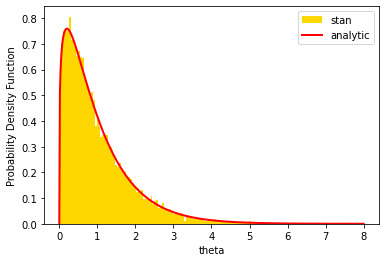

In [135]:
N = 500
xs = np.linspace(0, 8, N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1/1.25) 
df = out_gamma1.draws_pd()

# Histogram of theta samples with 160 bins add plot of analytical density
plt.hist(df['theta'], bins=160, density=True, color='gold', label="stan")
plt.plot(xs, pdfs, linewidth=2, color='red', label="analytic")
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.legend()
plt.show()

### Constrained parameter

In [136]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▏         | 00:00 Status


chain 1 |█▉        | 00:00 Iteration: 1100 / 7000 [ 15%]  (Sampling)
chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███▌      | 00:00 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)
chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 00:02 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:02 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:02 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▋   | 00:02 Iteration: 4500 / 7000 [ 64%] 


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab2 - Introduction to Stan/samples/code_5-20230318235254_1.csv, /home/Lab2 - Introduction to Stan/samples/code_5-20230318235254_2.csv, /home/Lab2 - Introduction to Stan/samples/code_5-20230318235254_3.csv, /home/Lab2 - Introduction to Stan/samples/code_5-20230318235254_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

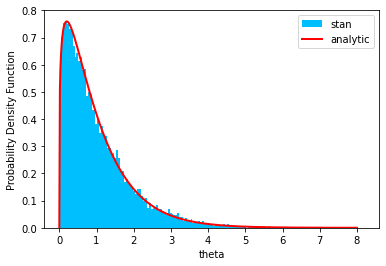

In [143]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 
df = out_gamma2.draws_pd()

# Histogram of theta samples from the second model with 160 bins add plot of analytical density
plt.hist(df['theta'], bins=160, density=True, color='deepskyblue', label="stan")
plt.plot(xs, pdfs, linewidth=2, color='red', label="analytic")
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.legend()
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


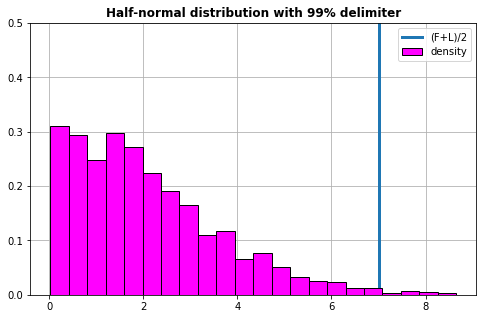

In [189]:
model_tune = CmdStanModel(stan_file='code_6.stan')

# initial guess for the equation solving
y0 = 2

# Sigma calculation using stan model
data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains=1)

# Preparing data for plots
sigma = tunes.draws_pd()['sigma'][0]
half_normal = np.abs(np.random.normal(0, sigma, 1000))
x_line = np.array([(F+L)/2, (F+L)/2])
y_line = np.array([0, 1])

# Histogram and 99% delimiter line
plt.figure(figsize=(8, 5))
plt.plot(x_line, y_line, linewidth=3, label='(F+L)/2')
plt.hist(half_normal, bins='auto', density=True, color='magenta', edgecolor="black", zorder=3, label='density')
plt.title("Half-normal distribution with 99% delimiter", fontweight="bold")
plt.grid(zorder=0)
plt.ylim(0, 0.5)
plt.legend()
plt.show()

## Excercise 5 - different methods of defining models


In [191]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
# integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
seed = 7062000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target(data=data,seed=seed)
result_3 = model_log_target_ind(data=data,seed=seed)

INFO:cmdstanpy:compiling stan file /home/Lab2 - Introduction to Stan/code_7.stan to exe file /home/Lab2 - Introduction to Stan/code_7
INFO:cmdstanpy:compiled model executable: /home/Lab2 - Introduction to Stan/code_7
--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpkcc0h211/tmp776o9m9y.hpp /tmp/tmpkcc0h211/tmp776o9m9y.stan
Warning in '/tmp/tmpkcc0h211/tmp776o9m9y.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/l

INFO:cmdstanpy:CmdStan done processing.


TypeError: 'CmdStanModel' object is not callable

In [ ]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [ ]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = )
# investigate the output and plot histogram of mean_y variable